## Dectect_Recognise_Obj_and_Faces

## AGENDA

- INTRODUCTION
- Object Detection with OpenCV using ***Pattern/Template Matching***
- Face Detection with OpenCV using ***HAAR Cascade Classifier***
- 

## INTRODUCTION

### What is OpenCV

### Refresher on Basics of Image Processing using OpenCV
- check the other material at home if you need a refresher

### Difference between "Recognition" and "Detection"


## Object Detection with OpenCV using ***Pattern/Template Matching***

### NOTE ON SETUP INSTRUCTIONS BEFORE GOING FURTHER

*** Make sure you have followed the setup instructions in the ReadMe_First.txt ***

Here is it again if you have not:

In [109]:
# print out ReadMe_First.txt
!cat ReadMe_First.txt

SET UP (HIGHLY RECOMMENDED)

install VS Code => https://code.visualstudio.com/Download
install anaconda => https://www.anaconda.com/distribution/#download-section
install git => https://git-scm.com/downloads

CREATE A PYTHON ENVIROMENT
run this command: (works as at 4/4/2020)
$ conda create --name imageproc python=3.8.1 numpy pandas scipy opencv
$ conda activate imageproc
$ conda install -c conda-forge opencv

CLONE THE REPOSIORY
run this command: (works as at 4/4/2020)
$ git clone ....

OPEN FOLDER IN VS CODE
$ cd ...; code .


### PLEASE: Confirm that all is fine (**IMPORTANT: on *VS Code***)
 
The proper way to open this project (from GUI)

 1. Open Visual Studio Code
 2. File -> Open Folder -> Choose the folder of the project

To confirm that all is okay, the path of the project should be displayed below

In [110]:
# when you run this cell. If it shows the temp folder, do it again
import os
print(os.getcwd())

c:\Users\saheed\Documents\ImageProcCourse\__FACE


### NOW WE CAN MOVE ON

In [137]:
# import all libraries to be used
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

### Template Matching

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv.matchTemplate() for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. (You can check docs for more details). It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). Once you got the result, you can use cv.minMaxLoc() function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.

*- source: OpenCV Doc*

In [449]:

# helper function to display image with pyplot
def show_im(image, size=None, title=""):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.title(title)
    plt.axis('off')
    
    if size is not None:
        plt.figure(figsize=size)
    
    plt.imshow(image_rgb)

In [450]:
# x_im = cv2.imread('./data/messi-ronaldo/messi-ronaldo-6.jpeg')
# show_im(x_im, size=(20, 20))

In [139]:

# template for football
im_ball_1_template = cv2.imread('./data/ball-1-temp.jpg')

# Messi full image-2 (template is a cut from this)
im_full_1 = cv2.imread('./data/messi-ball-9.jpg')

# template for Barcelona FC's badge
im_barca_template = cv2.imread('./data/barca-temp.jpg')

# template for football
im_ball_2_template = cv2.imread('./data/ball-2-temp.jpg')

# Messi full image-2 (template is a cut from this)
im_full_2 = cv2.imread('./data/messi-ball-3.jpg')


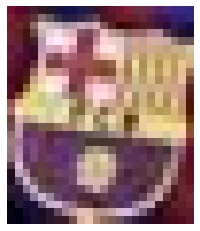

In [140]:
show_im(im_barca_template)


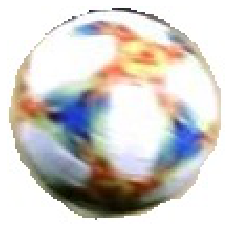

In [141]:
show_im(im_ball_2_template)

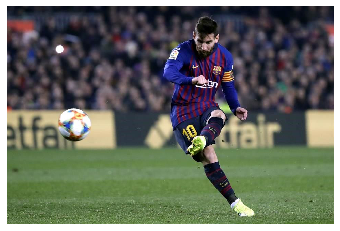

In [142]:
show_im(im_full_2)


In [143]:
# OpenCV has 6 methods for comparing a template to find it's match.
# we will use all 6 and examine their effectiveness

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


In [144]:
# Function to implement template matching (- adopted from OpenCV Doc)

def template_match(image, template, method):
    img = image.copy()
    method = eval(method)
    w, h = im_ball_1_template.shape[:-1][::-1]

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # setup rectangle to mark the match
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, (255, 255, 0), 3)
    
    # show the result
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

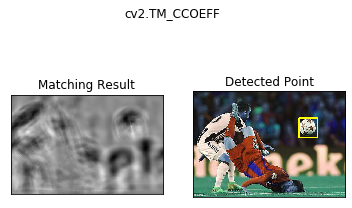

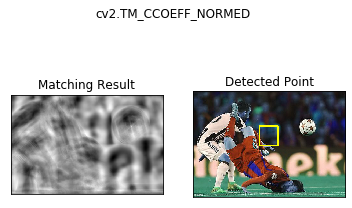

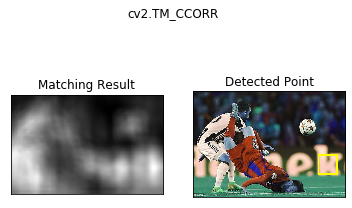

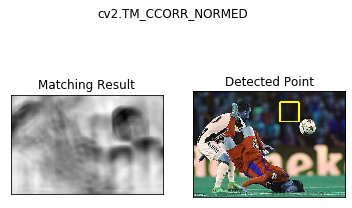

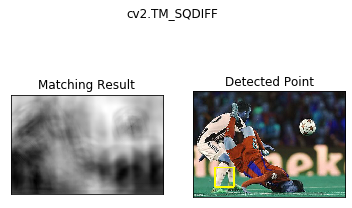

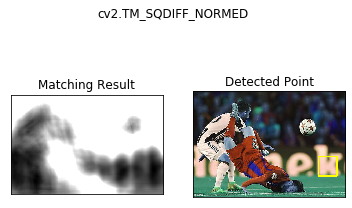

In [145]:
for meth in methods:
    template_match(im_full_1, im_ball_1_template, meth)

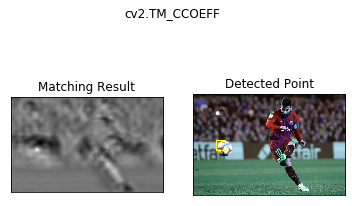

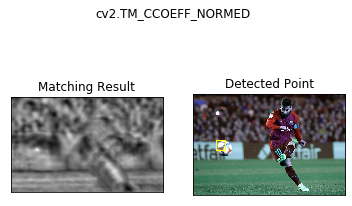

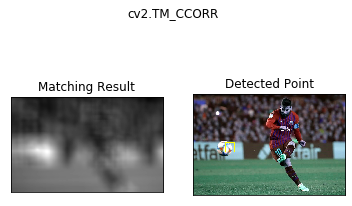

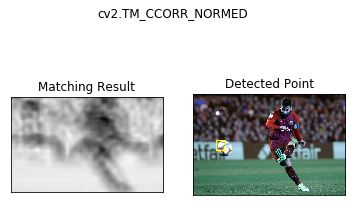

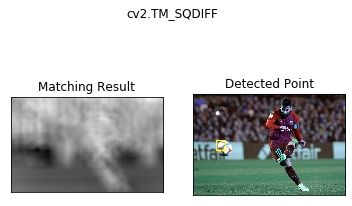

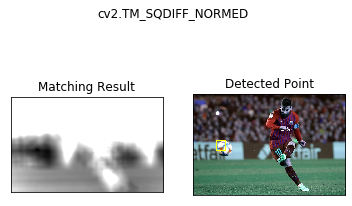

In [146]:
for meth in methods:
    template_match(im_full_2, im_ball_2_template, meth)

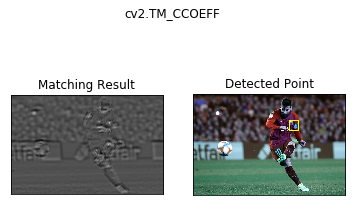

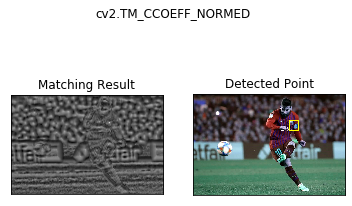

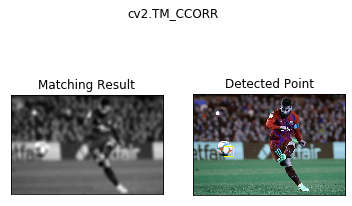

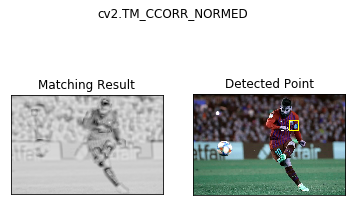

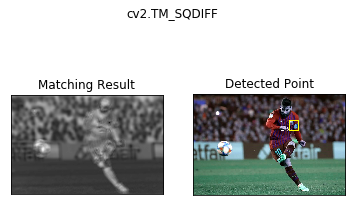

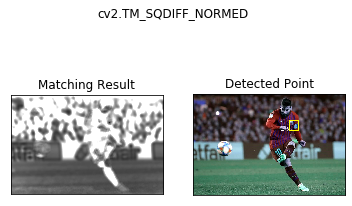

In [147]:
for meth in methods:
    template_match(im_full_2, im_barca_template, meth)

#### **HOME WORK:** think about why some algorithms perform poorly in some cases

- Is it the fault of the algorithm?
- Is it the fault of the template?
- Can we tweak some parameters to improve the results?

## Face Detection with OpenCV using ***HAAR Cascade Classifier***

For Face Detection in pure OpenCV we have to options *Local Binary Pattern Classifier* and *Haar Cascade Classifier*. The Haar Cascade Classifier Model which we will be using is trained using algorithms like ADAboost, and others. Those details are out of our current focus.

OpenCV comes with a lot of pre-trained HAAR Cascade classifiers like those trained to detect smile, eyes, face, etc. We can find them as xml files in the OpenCV's github repository here <https://github.com/opencv/opencv/tree/master/data/haarcascades>. We are interested in the file `haarcascade_frontalface_alt.xml`.

I have downloaded and included it in the project folder 

In [148]:
# read more images image
im1 = cv2.imread("./data/messi-ball-9.jpg")
im2 = cv2.imread("./data/messi1.jpg")


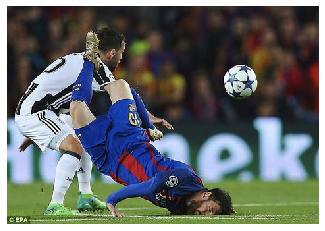

In [149]:
# cv2.imshow(im)
show_im(im1)

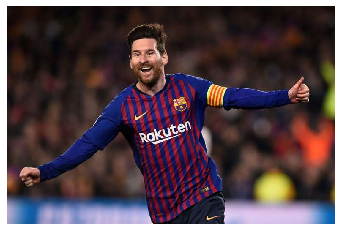

In [150]:
show_im(im2)

In [151]:
haarcascade_model = './data/haarcascade_frontalface_alt.xml'

# creat an instance of the the HAAR classifier
haar_cascade_face_model = cv2.CascadeClassifier(haarcascade_model)

In [152]:
# we want to work in gray scale
gray_image = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

dectected_faces = haar_cascade_face_model.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

# Retuned value is a List of tuples
# Each tuple describes the location on the image where the detected face is found
# The tuple is defined as (x, y, w, h)
# (x,y) = top-right corner of the rectangle that marks the face
# w = width of the rectangle
# h = height of the rectangle


In [153]:
# We now have the definition of rectangles making detected faces (if any)
# Let's draw an actually rectangle on these areas
# we'll do it on the actuall image

for (x, y, w, h) in dectected_faces:
    cv2.rectangle(im2, (x, y), (x+w, y+h), (0, 255, 255), 7)
    

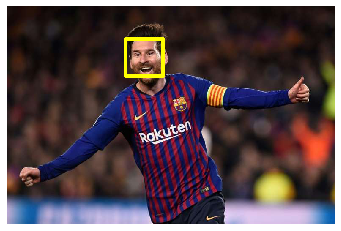

In [154]:
show_im(im2)

In [155]:
# Lets put all these pieces together in one function

def detect_face(image, face_classifier, scaleFactor=1.3, minNeighbors=5, thickness=7):
    '''
    This function uses the given HAAR classifier to detect faces in the given image
    It returns an image with yellow rectangle markers on the found faces
    '''
    
    image_copy = image.copy()
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_classifier.detectMultiScale(gray_image, scaleFactor, minNeighbors)

    for (x, y, w, h) in faces:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 255), thickness)
    
    return image_copy


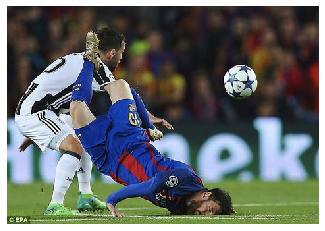

In [156]:
# let's try on some previous pictures

image_marked = detect_face(im1, haar_cascade_face_model)
show_im(image_marked)

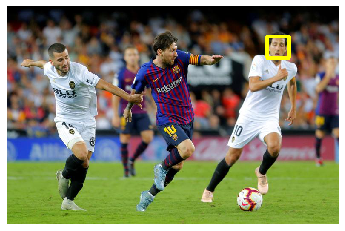

In [157]:
# Let's try another image
im3 = cv2.imread('./data/messi-ball-2.jpg')
image_marked = detect_face(im3, haar_cascade_face_model)
show_im(image_marked)

#### **Homework:** try out other pictures in the folder
- Think about what you observe about the effectiveness of this model
- When do it work?
- When does it fail?
- Can it be improved? (but this area is beyond the scope of our agenda today)

In [158]:
# LET'S TRY VIDEO TODO : create an external script and run it from here

# def grab_frame(video):
#     ret,frame = video.read()
#     return cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

# src = 'ytb/ronaldo_messi.mp4'
# # src = 1
# video_capture = cv2.VideoCapture(src)

# plt_im = plt.imshow(grab_frame(video_capture))

# count = 0
# large_num = 999999999
# plt.ion()

# while count < large_num:
#     plt_im.set_data(grab_frame(video_capture))
#     # plt.pause(0.2)
#     count +=1
# plt.ioff()
# plt.show()


## Face Recognition with OpenCV 

We can now detect a face in a picture, to recognise who is in that face we need a different algorithm, hence a different model. We need some level of knowledge before hand, how much knowledge is required depends on the algorithm we decide to use in training our model.

We have settled for a simple (perhaps the simplest) supervised learning algorithm: **KNN - *K Nearest Neighbour***

#TODO:(train 2 models or 1 model ?!)
We will be using it to train two model to learn how the faces Christiano Ronaldo and Lineo Messi (top two best footballers in the world) looks like. We will then put it to test if it has learn what we intend it to learn.

The pictures of faces of both footballers have been downloaded from various sources on the internet. We will use these to train our model. Note that you also acquire images from one single video, I encourage you to investigate on that.




In [159]:
# Function to retieve pictures for training
def get_images(folder_path, ext='jpg', size=(324,324)):
    faces = [cv2.imread(str(im), cv2.IMREAD_GRAYSCALE) for im in Path(folder_path).rglob('*.' + ext)]
    faces_sized = []
    for i, img  in enumerate(faces):
        width = size[0]
        height = size[1]
        dim = (width, height)
        
        # resize image
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        faces_sized.append(resized)
    return faces_sized 

In [160]:
# Get Messi's face
messi_faces = get_images('./data/lione-messi/')
# convert it into a Numpy array.
x = np.array(messi_faces)
x.shape

(10, 324, 324)

In [162]:
# Get Ronaldo's face
ronaldo_faces = get_images('./data/christian-ronaldo/')
# convert it into a Numpy array.
x2 = np.array(ronaldo_faces)
x2.shape

(10, 324, 324)

In [163]:
# Now we prepare train_data from both data
x_all = np.append(x,x2)
x_train = x_all.reshape(-1,(324**2)).astype(np.float32)
x_train.shape

(20, 104976)

In [166]:
# Create labels for train data
labels  = enumerate(['Lione Messi', 'Christian Ronaldo'])
k = [x for x,y in labels]
messi_labels = np.repeat(k[0],x.shape[0]) #labels for messi
ronaldo_labels = np.repeat(k[1],x2.shape[0]) #labels for ronaldo
x_train_labels = np.append(messi_labels, ronaldo_labels)[:,np.newaxis]
x_train_labels.shape

(20, 1)

In [165]:
# Create test data
mixed_faces = get_images('./data/test/')
# convert it into a Numpy array.
test_data = np.array(mixed_faces).reshape(-1,(324**2)).astype(np.float32)
test_data.shape

(10, 104976)

In [225]:

len(mixed_faces)

10

In [167]:
# Create label for the test data
messi_labels = np.repeat(k[0],(test_data.shape[0]/2)) #labels for messi
ronaldo_labels = np.repeat(k[0],(test_data.shape[0]/2)) #labels for ronaldo
test_labels = np.append(messi_labels, ronaldo_labels)[:,np.newaxis]
test_labels.shape

(10, 1)

In [169]:
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(x_train, cv2.ml.ROW_SAMPLE, x_train_labels)


True

In [170]:
# Now we test the KNN model 
ret,result,neighbours,dist = knn.findNearest(test_data,k=5)

In [171]:
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print(accuracy)

80.0


### Remark:

We now have a trained model which can recognise the face of Lione Messi and Christian Ronaldo with 80% acurracy. In real world 80% is a very bad result, however for a model trained with just 10 pictures we can be pardoned. We may have train the model with more pictures to improve the accuracy.


In [172]:
# save the training data for future use
np.savez('./data/opencv_knn_data_messi_ronaldo.npz',train=x_train, train_labels=x_train_labels)
# Now load the data
with np.load('./data/opencv_knn_data_messi_ronaldo.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']


['train', 'train_labels']


In [316]:
def detect_face_1(image, face_classifier, scaleFactor=1.3, minNeighbors=5, thickness=7):
    '''
    This function uses the given HAAR classifier to detect faces in the given image
    It returns an image with yellow rectangle markers on the found faces
    '''
    
    image_copy = image.copy()
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_classifier.detectMultiScale(gray_image, scaleFactor, minNeighbors)

    for (x, y, w, h) in faces:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 255), thickness)

        text = 'OpenCV'
        point = (10,500)
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 4
        color = (255,255,255,0)
        thickness = 2
        lineType = cv2.LINE_AA

        cv2.putText(image_copy,'A FACE',(x,y), font, 0.7,(255,255,255,0),2,cv2.LINE_AA)
    
    return image_copy


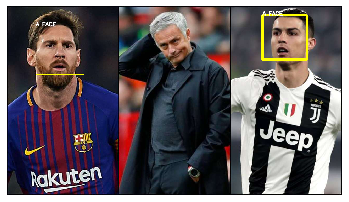

In [361]:
im3 = cv2.imread('./data/rsrv-ronaldo/extra/messi-ronaldo-7.jpeg')
image_ = detect_face_1(im3, haar_cascade_face_model)
# Put atext
font = cv2.FONT_HERSHEY_SIMPLEX
# text = cv2.putText(image_marked,'OpenCV',(10,500), font, 4,(255,255,255,0),2,cv2.LINE_AA)

show_im(image_)

### Puting Every pieces together

In [306]:
def locate_faces_in_picture(image, face_classifier, scaleFactor=1.3, minNeighbors=5, thickness=7):
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, scaleFactor, minNeighbors)
    return faces

def get_faces_from_location(image, location_list):

    face_list = []
    widths = [w for (x, y, w, h) in location_list]
    heights = [h for (x, y, w, h) in location_list]
    avg_w = sum(widths)//len(widths)
    avg_h = sum(heights)//len(heights)

    for (x, y, w, h) in location_list:
        im = cv2.cvtColor(image[y:y+h, x:x+w], cv2.COLOR_BGR2GRAY)      
        # face_list.append(cv2.resize(im, (avg_h,avg_w), interpolation = cv2.INTER_AREA))
        face_list.append(cv2.resize(im, (324,324), interpolation = cv2.INTER_AREA))
    
    return face_list


In [358]:
# load training data
with np.load('./data/opencv_knn_data_messi_ronaldo.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']

# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)


['train', 'train_labels']


True

In [472]:
im3 = cv2.imread('./data/messi-ronaldo/messi-ronaldo-2.jpeg')
face_locations = locate_faces_in_picture(im3, haar_cascade_face_model)
face_lists = get_faces_from_location(im3, face_locations)


In [473]:
# show_im(image_list[0])

In [474]:
# show_im(image_list[1])

In [475]:
face_lists[1].shape

(324, 324)

In [476]:
x = face_lists[0].shape[0] * face_lists[0].shape[0]
test_data = np.array(face_lists).reshape(-1,x).astype(np.float32)
test_data.shape

(2, 104976)

In [477]:

# Now we test the KNN model 
ret,result,neighbours,dist = knn.findNearest(test_data,k=3)
result


array([[1.],
       [0.]], dtype=float32)

In [478]:
labels  = enumerate(['Lione Messi', 'Christian Ronaldo'])
lbl = ['Lione Messi', 'Christian Ronaldo']

In [479]:
def evaluate_rslt(results, labels):
    lst = []
    for result in results:
        y = lbl[int(result)]
        lst.append(y)
    return lst

In [480]:
face_labels = evaluate_rslt(result, labels)
face_labels

['Christian Ronaldo', 'Lione Messi']

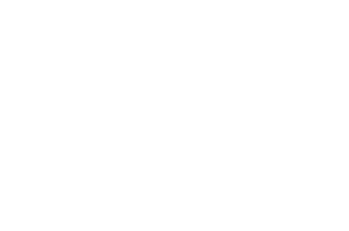

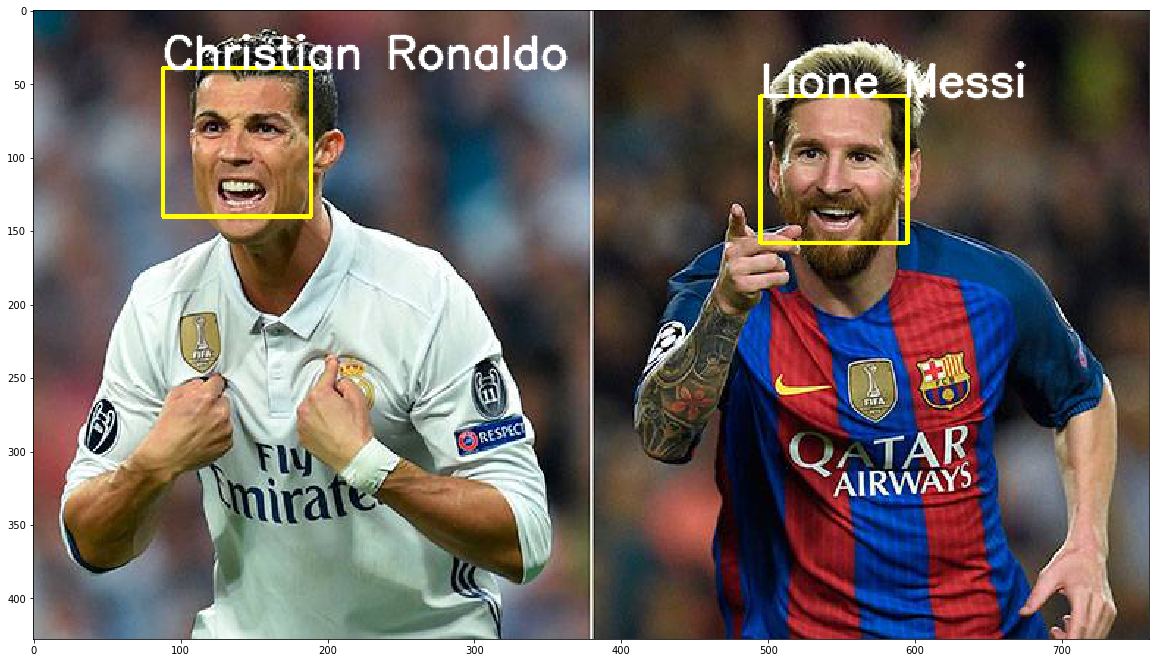

In [482]:
image = im3.copy()
for locs, label in zip(face_locations, face_labels):
        (x, y, w, h) = locs
        thickness = 2
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 255), thickness)
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 4
        color = (255,255,255,0)
        lineType = cv2.LINE_AA

        cv2.putText(image,label,(x,y), font, 1,color,2,cv2.LINE_AA)

show_im(image, size=(20,20))